# 1. 데이터 로드 및 압축 해제

In [178]:
import zipfile  # ZIP 파일을 압축 해제하기 위한 라이브러리
import pandas as pd  # 데이터 분석을 위한 라이브러리
import numpy as np  # 수학적 계산 및 배열 연산을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import seaborn as sns  # 고급 시각화를 위한 라이브러리
from collections import Counter  # 데이터의 빈도수를 계산하기 위한 라이브러리
from sklearn.impute import KNNImputer, SimpleImputer  # 결측치 처리를 위한 라이브러리
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # 범주형 데이터 변환을 위한 라이브러리

# --------------------------
# 1. 데이터 로드 및 압축 해제
# --------------------------

# ZIP 파일 경로 설정
zip_path = "/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open.zip"

# 압축을 풀 폴더 경로 설정
extracted_path = "/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open/"

# ZIP 파일을 열고 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# 학습 데이터(train)와 테스트 데이터(test) 파일 경로 설정
train_path = extracted_path + "train.csv"
test_path = extracted_path + "test.csv"

# CSV 파일을 데이터프레임으로 로드
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# 학습 데이터의 결측치 개수 출력
print("Missing values in train data:")
print(train_df.isnull().sum())

# 테스트 데이터의 결측치 개수 출력
print("\nMissing values in test data:")
print(test_df.isnull().sum())


Missing values in train data:
ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64

Missing values in test data:
ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64


# 2. 결측치 처리: KNN Imputation (숫자형 변수)

In [179]:
# --------------------------
# 2. 결측치 처리: KNN Imputation (숫자형 변수)
# --------------------------

# 결측치를 채울 숫자형 변수 목록 정의
numeric_columns = ['전용면적', '해당층', '총층', '총주차대수','방수']

# KNN Imputer를 사용하여 결측치를 채우는 함수 정의
def apply_imputation(df):
    # 숫자형 변수만 선택
    numeric_data = df[numeric_columns]
    
    # KNN Imputer 설정 (가까운 3개의 이웃을 사용하여 결측치 보완)
    imputer = KNNImputer(n_neighbors=3)
    
    # 결측치 보완 수행
    imputed_data = imputer.fit_transform(numeric_data)
    
    # 변환된 데이터를 원래 데이터프레임에 반영
    df[numeric_columns] = pd.DataFrame(imputed_data, columns=numeric_columns, index=df.index)
    
    return df

# 학습 데이터(train)와 테스트 데이터(test)에 결측치 보완 적용
train_df = apply_imputation(train_df)
test_df = apply_imputation(test_df)

# 결측치 처리 후, 남아있는 결측치 개수 출력
print("After imputation:")
print(train_df[numeric_columns].isnull().sum())  # 학습 데이터의 결측치 개수 출력
print(test_df[numeric_columns].isnull().sum())  # 테스트 데이터의 결측치 개수 출력

# 학습 데이터와 테스트 데이터의 첫 번째 행을 출력하여 확인
display(train_df.head(1))
display(test_df.head(1))


After imputation:
전용면적     0
해당층      0
총층       0
총주차대수    0
방수       0
dtype: int64
전용면적     0
해당층      0
총층       0
총주차대수    0
방수       0
dtype: int64


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,17.5,12.333333,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,24.173333,5.0,5.0,남향,1.0,1.0,불가능,2.0,7,Z86Th6S3K5,D플랫폼,2024-10-21


# 3. 특성 엔지니어링

In [180]:

# --------------------------
# 3. 특성 엔지니어링
# --------------------------
# 면적대비가격, 층간비율 계산
train_df['면적대비가격'] = (train_df['보증금'] + train_df['월세'] * 100) / train_df['전용면적']
train_df['층간비율'] = train_df['해당층'] / train_df['총층']

test_df['면적대비가격'] = (test_df['보증금'] + test_df['월세'] * 100) / test_df['전용면적']
test_df['층간비율'] = test_df['해당층'] / test_df['총층']

# 날짜 처리: '게재일'을 datetime형으로 변환하고, 월 및 계절 파생변수 생성
train_df['게재일'] = pd.to_datetime(train_df['게재일'])
train_df['month'] = train_df['게재일'].dt.month
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
train_df['season'] = train_df['month'].apply(month_to_season)

test_df['게재일'] = pd.to_datetime(test_df['게재일'])
test_df['month'] = test_df['게재일'].dt.month
test_df['season'] = test_df['month'].apply(month_to_season)

display(train_df.head(1))
display(test_df.head(1))


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,...,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,면적대비가격,층간비율,month,season
0,TRAIN_0000,현장확인,402500000.0,470000,17.5,12.333333,15.0,서향,1.0,1.0,...,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,2.568571e+07,0.822222,10,Fall


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,면적대비가격,층간비율,month,season
0,TEST_000,서류확인,223000000.0,530000,24.173333,5.0,5.0,남향,1.0,1.0,불가능,2.0,7,Z86Th6S3K5,D플랫폼,2024-10-21,1.141754e+07,1.0,10,Fall


# 4. 불필요한 컬럼 제거 및 범주형 변수 인코딩 / One-Hot 인코딩

In [181]:

# --------------------------
# 4. 불필요한 컬럼 제거 및 범주형 변수 인코딩 / One-Hot 인코딩
# --------------------------
# 불필요한 컬럼 제거
train_df.drop(['ID','총주차대수', '욕실수'], axis=1, inplace=True)
test_id = test_df['ID']
test_df.drop(['ID', '총주차대수', '욕실수'], axis=1, inplace=True)

# 레이블 인코딩: '중개사무소', '게재일', '제공플랫폼', '방향', 'season'
label_encode_cols = ['중개사무소', '제공플랫폼', 'season', '방향','게재일']
for col in label_encode_cols:
    le = LabelEncoder()
    combined = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

# One-Hot 인코딩: '주차가능여부', '매물확인방식'
train_df = pd.get_dummies(train_df, columns=['주차가능여부','매물확인방식'])
test_df = pd.get_dummies(test_df, columns=['주차가능여부','매물확인방식'])

# (필요시 train, test 컬럼 맞추기)
# train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

display(train_df.head(1))
display(test_df.head(1))
print(train_df.isnull().sum())
print(test_df.isnull().sum())


,보증금,월세,전용면적,해당층,총층,방향,방수,관리비,중개사무소,제공플랫폼,...,허위매물여부,면적대비가격,층간비율,month,season,주차가능여부_가능,주차가능여부_불가능,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
0,402500000.0,470000,17.5,12.333333,15.0,7,1.0,96,256,1,...,0,2.568571e+07,0.822222,10,0,True,False,False,False,True


,보증금,월세,전용면적,해당층,총층,방향,방수,관리비,중개사무소,제공플랫폼,게재일,면적대비가격,층간비율,month,season,주차가능여부_가능,주차가능여부_불가능,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
0,223000000.0,530000,24.173333,5.0,5.0,2,1.0,7,151,3,420,1.141754e+07,1.0,10,0,False,True,True,False,False


보증금            0
월세             0
전용면적           0
해당층            0
총층             0
방향             0
방수             0
관리비            0
중개사무소          0
제공플랫폼          0
게재일            0
허위매물여부         0
면적대비가격         0
층간비율           0
month          0
season         0
주차가능여부_가능      0
주차가능여부_불가능     0
매물확인방식_서류확인    0
매물확인방식_전화확인    0
매물확인방식_현장확인    0
dtype: int64
보증금            0
월세             0
전용면적           0
해당층            0
총층             0
방향             0
방수             0
관리비            0
중개사무소          0
제공플랫폼          0
게재일            0
면적대비가격         0
층간비율           0
month          0
season         0
주차가능여부_가능      0
주차가능여부_불가능     0
매물확인방식_서류확인    0
매물확인방식_전화확인    0
매물확인방식_현장확인    0
dtype: int64


# 5. 상관관계 히트맵 및 타겟 분포 확인

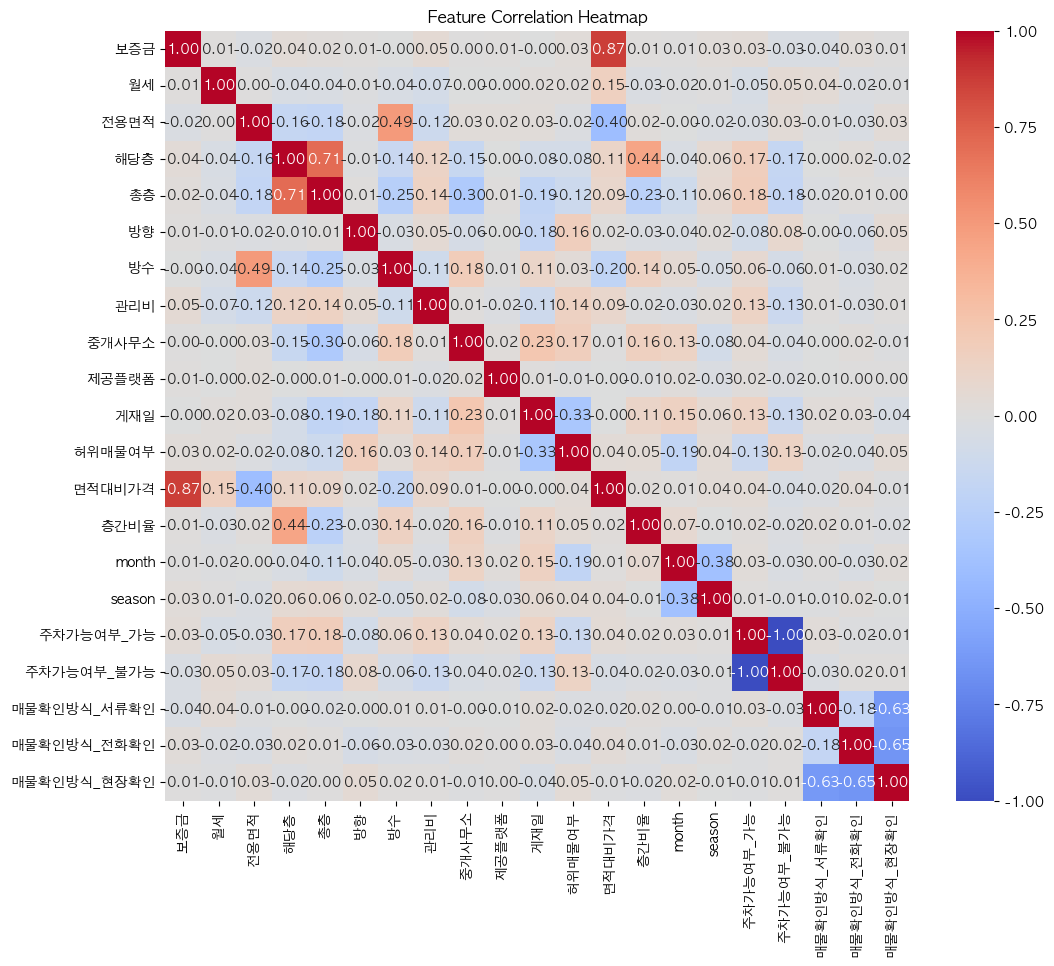

Class Distribution: Counter({0: 2154, 1: 298})


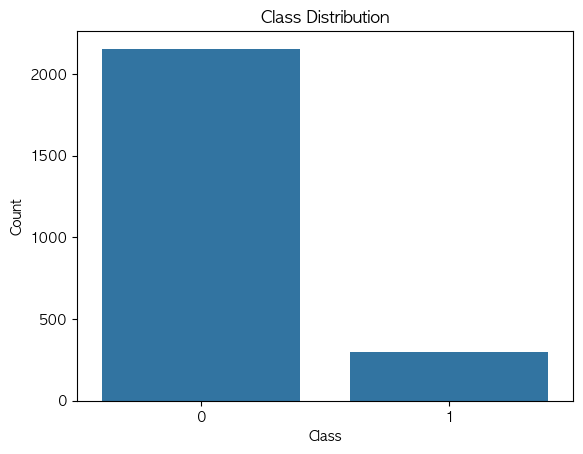

In [182]:

# --------------------------
# 5. 상관관계 히트맵 및 타겟 분포 확인
# --------------------------
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False



plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 타겟 변수 분리 및 분포 확인
y = train_df['허위매물여부']
train_df.drop(['허위매물여부'], axis=1, inplace=True)

print("Class Distribution:", Counter(y))
sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


# 6. 수치형 변수 스케일링 (StandardScaler)

In [183]:

# --------------------------
# 6. 수치형 변수 스케일링 (StandardScaler)
# --------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

scaler = StandardScaler()
qt = QuantileTransformer(output_distribution='normal', random_state=0)

exclude_cols = ['매물확인방식', '주차가능여부', 'season'] #, '방향'
numeric_cols_train = [col for col in train_df.columns if col not in exclude_cols]
numeric_cols_test = [col for col in test_df.columns if col not in exclude_cols]

# train_df[numeric_cols_train] = scaler.fit_transform(train_df[numeric_cols_train])
# test_df[numeric_cols_test] = scaler.transform(test_df[numeric_cols_test])

train_df[numeric_cols_train] = qt.fit_transform(train_df[numeric_cols_train])
test_df[numeric_cols_test] = qt.transform(test_df[numeric_cols_test])

print("Processed train data:")
print(train_df.head())
print("Processed test data:")
print(test_df.head())


Processed train data:
        보증금        월세      전용면적       해당층        총층        방향        방수  \
0  2.131682  0.322932 -5.199338  1.634747  1.128144  5.199338 -5.199338   
1  0.455640 -0.686350  1.204935 -0.385726 -0.848075 -5.199338  5.199338   
2 -0.184203  0.010037 -0.090452 -1.064091 -1.425011  0.186756 -5.199338   
3  0.372246 -2.119668  1.004131 -0.385726  0.513491 -5.199338  5.199338   
4  1.042247  0.571638  1.014571 -0.385726 -1.425011  0.186756  5.199338   

        관리비     중개사무소     제공플랫폼       게재일    면적대비가격      층간비율     month  \
0  5.199338  1.307063  0.037646  0.253606  2.625581  0.689529  0.328223   
1 -5.199338  1.070745  0.914679  1.355761 -0.285972  0.392492  5.199338   
2 -5.199338  0.543789 -5.199338  0.893908 -0.093806  0.033880  0.819656   
3  0.846279 -0.774833 -5.199338  0.866189 -0.417625 -1.250242  0.819656   
4 -5.199338 -0.025094  0.037646 -0.510631  0.773240  1.529558 -0.672129   

   season  주차가능여부_가능  주차가능여부_불가능  매물확인방식_서류확인  매물확인방식_전화확인  매물확인방식_현장확인  
0 

# 7. Train/Validation 분할 및 ADASYN 오버샘플링

In [184]:

# --------------------------
# 7. Train/Validation 분할 및 ADASYN 오버샘플링
# --------------------------
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, BorderlineSMOTE

x_train, x_valid, y_train, y_valid = train_test_split(
    train_df, y, test_size=0.2, random_state=0, stratify=y
)

print("Before ADASYN:", dict(zip(*np.unique(y_train, return_counts=True))))
adasyn = ADASYN(n_neighbors=3, sampling_strategy='auto', random_state=0)
#smote = BorderlineSMOTE(sampling_strategy='auto', random_state=0)
#x_train, y_train = smote.fit_resample(x_train, y_train)
x_train, y_train = adasyn.fit_resample(x_train, y_train)
print("After ADASYN:", dict(zip(*np.unique(y_train, return_counts=True))))
print(x_train.shape, y_train.shape)


Before ADASYN: {0: 1723, 1: 238}
After ADASYN: {0: 1723, 1: 1714}
(3437, 20) (3437,)


In [185]:
# --------------------------
# Mixup 증강 함수 (DataFrame, Series 처리)
# --------------------------
def mixup_data(X, y, alpha=0.2):
    """
    X: 입력 피처 (DataFrame 또는 numpy array)
    y: 레이블 (Series 또는 numpy array) - 이진 분류 (0, 1)로 가정
    alpha: 베타 분포 파라미터
    """
    # DataFrame 또는 Series라면 numpy array로 변환
    if isinstance(X, pd.DataFrame):
        X_array = X.values
    else:
        X_array = X
        
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y_array = y.values
    else:
        y_array = y

    lam = np.random.beta(alpha, alpha)
    indices = np.random.permutation(X_array.shape[0])
    
    # Mixup 적용: 두 샘플의 선형 결합
    X_mix = lam * X_array + (1 - lam) * X_array[indices]
    y_mix_cont = lam * y_array + (1 - lam) * y_array[indices]
    # 이진 분류라면 0.5 기준으로 이진화
    y_mix = (y_mix_cont > 0.5).astype(int)
    
    return X_mix, y_mix

# --------------------------
# 기존 파이프라인 (ADASYN 후 Mixup 적용)
# --------------------------
# ADASYN 오버샘플링 후 학습 데이터 (x_train, y_train)는 이미 준비되어 있습니다.
print("Before Mixup augmentation:", x_train.shape, y_train.shape)
# Mixup 적용 (alpha 값은 조정 가능)
X_mix, y_mix = mixup_data(x_train, y_train, alpha=0.15)
# 원래 데이터와 증강된 데이터를 결합
x_train = np.concatenate([x_train, X_mix], axis=0)
y_train = np.concatenate([y_train, y_mix], axis=0)
x_valid = x_valid.to_numpy()
print("After Mixup augmentation:", x_train.shape, y_train.shape)




Before Mixup augmentation: (3437, 20) (3437,)
After Mixup augmentation: (6874, 20) (6874,)


# 8. 머신러닝 모델 학습


In [196]:
# --------------------------
# 8. 머신러닝 모델 학습
# --------------------------
# 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


# 개별 모델 선언 및 파라미터 설정
ridge = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
elasticnet = LogisticRegression(penalty='l2', max_iter=1000)
rdb = RandomForestClassifier(class_weight='balanced')
ada = AdaBoostClassifier()

best_params_forxgboost = {
    'learning_rate': 0.04199630035031584,
    'n_estimators': 859,
    'max_depth': 5,
    'min_child_weight': 0.5222930361321483,
    'subsample': 0.8894885475081695,
    'colsample_bytree': 0.6985863441288725,
    'reg_alpha': 0.0011999031625662903,
    'reg_lambda': 0.756819765848095,
    'gamma': 0.04711734917678012
}
xgb = XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), 
                     eval_metric='logloss', **best_params_forxgboost)
xgbrf = XGBRFClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)),
                         eval_metric='logloss')
svc = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True, bootstrap=False)
lgbm = LGBMClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)),
                      
                     colsample_bytree=0.7327575467369435, learning_rate=0.039071905080266756,
                     max_depth=7, min_child_samples=38, n_estimators=291, num_leaves=213,
                     reg_alpha=0.06811265491013706, reg_lambda=0.11380851183788578,
                     subsample=0.8459571849483574,verbose=-1)

cat = CatBoostClassifier(verbose=0)
dt = DecisionTreeClassifier(class_weight='balanced')
et = ExtraTreeClassifier(class_weight='balanced')

# Stacking 모델 구성
meta_model_xgb = XGBClassifier(n_estimators=100, eval_metric='logloss')
base_learners = [('xgb', xgb), ('lgb', lgbm)]
stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_model_xgb)

# HistGradientBoostingClassifier 모델
model1 = HistGradientBoostingClassifier(
    learning_rate=0.2368,
    max_iter=677,
    max_depth=11,
    l2_regularization=6.7094,
    min_samples_leaf=8,
    max_leaf_nodes=182,
    random_state=0
)

# 모델 학습
models = {
    'rdb': rdb,
    'ada': ada,
    'xgb': xgb,
    'lgbm': lgbm,
    'cat': cat,
    'stacking': stacking,
    'HGradientBoost': model1
}

for name, model in models.items():
    model.fit(x_train, y_train)


# 9. 모델 평가 (f1_score 등)

In [197]:
# --------------------------
# 9. 모델 평가 (f1_score 등)
# --------------------------
from sklearn.metrics import f1_score


# 각 모델 평가
for name, model in models.items():
    pred = model.predict(x_valid)
    f1 = f1_score(y_valid, pred, average='macro')
    score = model.score(x_valid, y_valid)
    print(f"{name} - Accuracy: {score:.4f}, f1_macro: {f1:.4f}")


rdb - Accuracy: 0.9348, f1_macro: 0.8581
ada - Accuracy: 0.9206, f1_macro: 0.8404
xgb - Accuracy: 0.9470, f1_macro: 0.8783
lgbm - Accuracy: 0.9511, f1_macro: 0.8892
cat - Accuracy: 0.9470, f1_macro: 0.8816
stacking - Accuracy: 0.9552, f1_macro: 0.8970
HGradientBoost - Accuracy: 0.9593, f1_macro: 0.9064


# 9-1 모델별 f1 score가 0.90 이상인 모델 출력


In [198]:

# 모델별 f1 score가 0.90 이상인 모델 출력
high_f1_models = {}
for name, model in models.items():
    pred = model.predict(x_valid)
    f1 = f1_score(y_valid, pred, average='macro')
    if f1 >= 0.92:
        high_f1_models[name] = f1
print("Models with f1_macro >= 0.90:")
for name, f1 in high_f1_models.items():
    print(f"{name}: {f1:.4f}")


Models with f1_macro >= 0.90:


In [189]:

# BaggingClassifier 적용 (예: LGBM 기반)
from sklearn.ensemble import BaggingClassifier
bagging_xgb = BaggingClassifier(estimator=lgbm, n_estimators=100)
bagging_xgb.fit(x_train, y_train)
y_pred_bag = bagging_xgb.predict(x_valid)
print(f"Bagging f1_macro: {f1_score(y_valid, y_pred_bag, average='macro'):.4f}")


Bagging f1_macro: 0.8779


# 10. Voting Classifier 앙상블 및 테스트 데이터 예측

In [190]:
# --------------------------
# 10. Voting Classifier 앙상블 및 테스트 데이터 예측
# --------------------------
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm),
        ('HGradientBoost', model1),
        #('stacking', stacking)
        ('xgb', xgb),
        #('cat', cat)
   
    ],
    voting='soft'#, weights=[3, 2, 3] # 2로 한 이유 
)
# 최종 모델 학습: 전체 train 데이터 사용
#voting_clf.fit(train_df, y)
voting_clf.fit(x_train, y_train)

y_pred_voting = voting_clf.predict(x_valid)
print(f"Voting Classifier f1_macro: {f1_score(y_valid, y_pred_voting, average='macro'):.4f}")


Voting Classifier f1_macro: 0.8892


In [191]:
# from sklearn.metrics import f1_score
# import numpy as np

# soft voting 앙상블 모델이므로 predict_proba를 사용합니다.
# 1번 클래스의 확률값을 가져옵니다.
# probs = voting_clf.predict_proba(x_valid)[:, 1]

# best_threshold = 0.5
# best_f1 = 0

# # 임계값을 0.3부터 0.7까지 0.01 간격으로 변화시키며 최적의 임계값 찾기
# for threshold in np.arange(0.3, 0.7, 0.01):
#     preds = (probs >= threshold).astype(int)
#     current_f1 = f1_score(y_valid, preds, average='macro')
#     if current_f1 > best_f1:
#         best_f1 = current_f1
#         best_threshold = threshold

# print("최적의 임계값:", best_threshold)
# print("최적의 f1_macro:", best_f1)


In [195]:
# train_preds = voting_clf.predict(x_train)
# val_preds = voting_clf.predict(x_valid)

# from sklearn.metrics import f1_score

# train_f1 = f1_score(y_train, train_preds, average="macro")
# val_f1 = f1_score(y_valid, val_preds, average="macro")

# print(f"Train F1-score: {train_f1:.4f}")
# print(f"Validation F1-score: {val_f1:.4f}")


In [192]:
voting_clf.fit(train_df, y)

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(colsample_bytree=0.7327575467369435,
                                             learning_rate=0.039071905080266756,
                                             max_depth=7, min_child_samples=38,
                                             n_estimators=291, num_leaves=213,
                                             reg_alpha=0.06811265491013706,
                                             reg_lambda=0.11380851183788578,
                                             scale_pos_weight=1.0052508751458575,
                                             subsample=0.8459571849483574,
                                             verbose=-1)),
                             ('HGradientBoost',
                              HistG...
                                            interaction_constraints=None,
                                            learning_rate=0.04199630035031584,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=0.5222930361321483,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=859, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [193]:

# 테스트 데이터 예측 및 제출 파일 생성
sub = voting_clf.predict(test_df)
sample = pd.read_csv('/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open/sample_submission.csv')
sample['허위매물여부'] = sub
print(sample)


           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]


In [194]:
sample.to_csv('voting_qt_all2.csv', index=False)